<a href="https://colab.research.google.com/github/Potdooshami/2H_TaSe2_Tc_STM/blob/main/Lawler_Fujita(118K_40nm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load File

## Dataprocessing environment setting

load `.gwy` files' list

load `.gwy` files' header

In [ ]:

fn = '2HTaSe2_ap_118K002'

In [20]:

%run pipe/loadHeaderTbls.py
sz_nano = dfCrrent.loc[fn][['scan_range_1_sxm','scan_range_2_sxm']].values *1000000000
pxl = dfCrrent.loc[fn][['scan_pixels_1_sxm','scan_pixels_2_sxm']].values
print(sz_nano,pxl)

[np.float64(40.0) np.float64(40.0)] [np.int64(512) np.int64(512)]


## Choose a file

## Declare 1st array

In [1]:
import modl

In [2]:
modl.loadgwy

AttributeError: module 'modl' has no attribute 'loadgwy'

AttributeError: module 'modl' has no attribute 'loadgwy'

In [30]:
# import gwyfile
# import numpy as np

# gwy open
# fnlong = '2HTaSe2_ap_118K002.gwy'
fnlong = '2HTaSe2_ap_118K002.gwy'
arr = modl.loadgwy(fnlong)
# container = gwyfile.load(fnlong)

AttributeError: module 'modl' has no attribute 'loadgwy'

In [ ]:

# arr = container['/0/data']['data']
# arr = arr.reshape(pxl)

# Remove Background

## fcn spaces

In [11]:
from matplotlib import pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.morphology import binary_opening, disk, binary_dilation
from skimage.restoration import inpaint
def ceilcut(image,threshold):
  imagec = image.copy()
  imagec[image>threshold] = threshold
  return imagec
def replace_with_average(img_original, bw):
  """
  Replaces the value of specific part of image as average.

  Args:
    img_original: (n,m) float array, the original image.
    bw: (n,m) boolean array, the mask where True indicates the part to be replaced.

  Returns:
    img_cleaned: (n,m) float array, the image with the specified part replaced by the average.
  """
  # Calculate the average of the values in img_original where bw is False
  average_false_part = np.mean(img_original[~bw])

  # Create a copy of the original image
  img_cleaned = img_original.copy()

  # Replace the values in img_cleaned where bw is True with the calculated average
  img_cleaned[bw] = average_false_part

  return img_cleaned

## Tip excitation remove

In [12]:
p = 10**(-12)
# ac,ac2 = auto_clim(arr)
cut_l = arr> p*10
cut_h = arr> p*30

selem_size = 1 # Example size, you might need to tune this
selem = disk(selem_size)

# Apply the binary opening operation
opened = binary_opening(cut_l, footprint=selem)
opened_dil =  binary_dilation(opened,footprint=disk(1))
fianl_tipex = cut_l & ~opened_dil
interped_avg = replace_with_average(arr, fianl_tipex)
# interped_inpaint = inpaint.inpaint_biharmonic(arr, fianl_tipex, channel_axis=-1)
interped_inpaint = inpaint.inpaint_biharmonic(arr, fianl_tipex)

## High-pass filter

In [13]:
param_ceilCut = 10 # @param
param_sigma = 5 # @param
from scipy.ndimage import gaussian_filter
# arr_c = ceilcut(arr,p*param_ceilCut)
lowfreq = gaussian_filter(interped_avg,sigma=param_sigma)
highfreq = interped_avg - lowfreq

In [14]:
def tickoff():
  ax = plt.gca()
  ax.set_xticks([])
  ax.set_yticks([])

In [15]:
def replace_with_average(img_original, bw):
  """
  Replaces the value of specific part of image as average.

  Args:
    img_original: (n,m) float array, the original image.
    bw: (n,m) boolean array, the mask where True indicates the part to be replaced.

  Returns:
    img_cleaned: (n,m) float array, the image with the specified part replaced by the average.
  """
  # Calculate the average of the values in img_original where bw is False
  average_false_part = np.mean(img_original[~bw])

  # Create a copy of the original image
  img_cleaned = img_original.copy()

  # Replace the values in img_cleaned where bw is True with the calculated average
  img_cleaned[bw] = average_false_part

  return img_cleaned

## Visualization

In [16]:
def gci():
    """
    Get the current image object.

    Returns
    -------
    matplotlib.image.AxesImage
        The most recently added image object on the current axes.
    """
    return plt.gca().images[-1]

def change_image_range(image_object, vmin=None, vmax=None):
    """
    Change the vmin and vmax of a matplotlib image object.

    Parameters
    ----------
    image_object : matplotlib.image.AxesImage
        The image object to modify.
    vmin : float, optional
        The new minimum value for the color mapping. If None, the current vmin is kept.
    vmax : float, optional
        The new maximum value for the color mapping. If None, the current vmax is kept.
    """
    if vmin is not None:
        image_object.set_clim(vmin=vmin)
    if vmax is not None:
        image_object.set_clim(vmax=vmax)

def auto_clim(data, method='percentile', lower=1, upper=99):
    """
    data: 2D array
    method: 'percentile' or 'std'
    """
    if method == 'percentile':
        vmin, vmax = np.percentile(data, [lower, upper])
    elif method == 'std':
        mean = np.mean(data)
        std = np.std(data)
        vmin, vmax = mean - std, mean + std
    else:
        raise ValueError("method must be 'percentile' or 'std'")
    return vmin, vmax
# def ac():

In [17]:
def auto199():
  ic = gci()
  foo = ic.get_array()
  aclim =  auto_clim(foo, method='percentile', lower=1, upper=99)
  change_image_range(ic, aclim[0], aclim[1])

In [18]:
def plot_result(image, background):
    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original image')
    ax[0].axis('off')

    ax[1].imshow(background, cmap='gray')
    ax[1].set_title('Background')
    ax[1].axis('off')

    ax[2].imshow(image - background, cmap='gray')
    ax[2].set_title('Result')
    ax[2].axis('off')

    fig.tight_layout()
    return fig,ax

phasemap

# FFT peak find

In [21]:
from scipy.fft import fft2, fftshift
from skimage.feature import peak_local_max
def fft2show(arr_cln,vmin,vmax):
  fft_result = fft2(arr_cln)
  fft_result_shifted = fftshift(fft_result)
  magnitude_spectrum = np.abs(fft_result_shifted)
  plt.figure(figsize=(10, 10))
  plt.imshow(magnitude_spectrum, cmap='gray', vmin=vmin, vmax=vmax)
  plt.title('Magnitude Spectrum of 2D FFT')
  return  magnitude_spectrum
def fft2pkfnd(fft2abs,threshold,choose):
  coordinates = peak_local_max(fft2abs, min_distance=100, threshold_abs = threshold)
  plt.scatter(coordinates[:, 1], coordinates[:, 0], s=50, facecolors='none', edgecolors='r')
  for ipeak in range(coordinates.shape[0]):
    plt.text(coordinates[ipeak,1],coordinates[ipeak,0],str(ipeak), color='g')
  coordinates_choose = coordinates[choose,:]
  print(coordinates_choose)
  print(coordinates_choose.shape[0])
  for ipeak in range(coordinates_choose.shape[0]):
    plt.text(coordinates_choose[ipeak,1],coordinates_choose[ipeak,0],str(ipeak), color='b',size= 20)
    pk_all = coordinates - (np.array(fft2abs.shape)/2)
    pk_choose = pk_all[choose,:]
  return pk_choose,pk_all
arr_cln = highfreq

##handles

In [22]:
vmin = 0 # @param
vmax = 0.0000001 # @param
threshold = 0.00000001 # @param
choose = [0,2,5] # @param

## Visualization for Check

[[238 114]
 [130 350]
 [401 304]]
3
[[ -18. -142.]
 [-126.   94.]
 [ 145.   48.]]
[[ -18. -142.]
 [  18.  142.]
 [-126.   94.]
 [ 126.  -94.]
 [-145.  -48.]
 [ 145.   48.]]


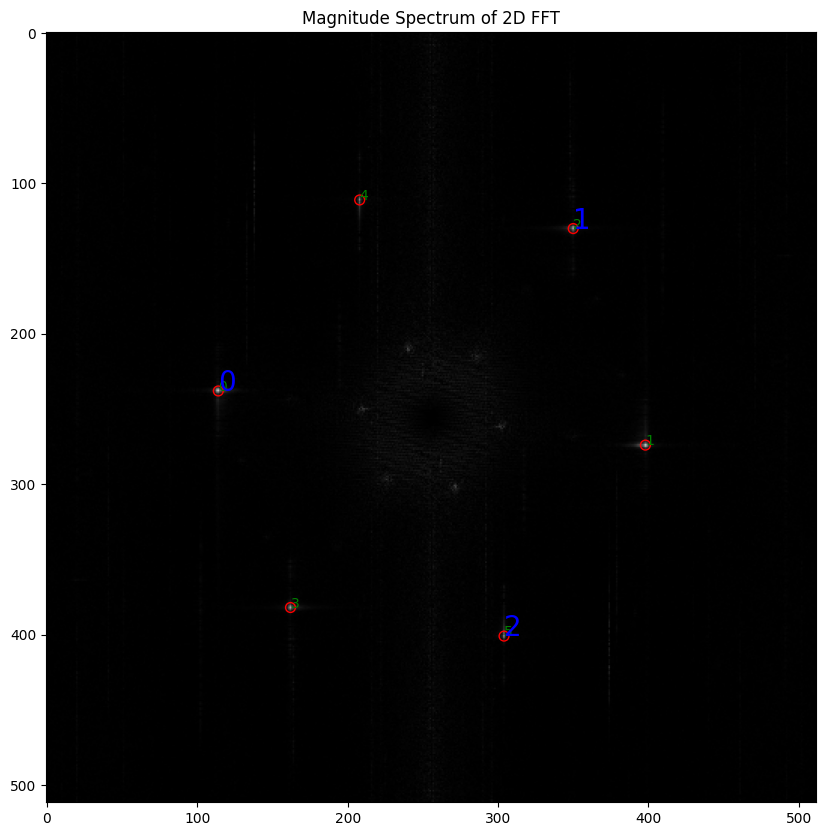

In [23]:
fft2abs = fft2show(arr_cln,vmin,vmax)
pk_choose,pk_all = fft2pkfnd(fft2abs,threshold,choose)
print(pk_choose)
print(pk_all)

#Remove extrinsic drift effect

In [24]:
def generate_sine_wave_from_k(k_value,  arr_shape,phi=0):
  """
  Generates a 2D sine wave based on a k-value (spatial frequency vector).

  Args:
    k_value: A 2-element numpy array representing the centered k-vector
             (ky_c, kx_c) in pixel units from the FFT.
    arr_shape: A tuple (image_height, image_width) representing the shape
               of the desired output image in pixels.
    phi: Optional phase offset in radians. Defaults to 0.

  Returns:
    A 2D numpy array representing the sine wave.
  """
  # Get the centered k-vector components
  ky_c = k_value[0]
  kx_c = k_value[1]
  image_height, image_width = arr_shape
  # Create a grid of spatial coordinates (pixel indices)
  y_indices, x_indices = np.indices((image_height, image_width))

  # Calculate spatial frequencies in cycles per pixel
  spatial_freq_x_cpp = kx_c / image_width
  spatial_freq_y_cpp = ky_c / image_height

  # Construct the full argument for the sine wave, including the 2*pi factor and phase
  argument = 2 * np.pi * (spatial_freq_x_cpp * x_indices + spatial_freq_y_cpp * y_indices) + phi

  # Generate the sine wave
  sine_wave = np.sin(argument)

  return sine_wave
def kdispacementmap(arr,k,sig):
  sw = generate_sine_wave_from_k(k,  arr.shape,0)
  cw = generate_sine_wave_from_k(k,  arr.shape,np.pi/2)
  sprod = gaussian_filter(sw*arr,sig)
  cprod = gaussian_filter(cw*arr,sig)
  xprod = cprod +sprod*1j
  return xprod
def visxprod(xprod):
  fig,axs = plt.subplots(2,2,figsize=(10, 10))

  #sw = generate_sine_wave_from_k(k,  aff_br.shape,0)
  tns = ['Re','Img','theta','radial']
  isbs = [0,0,1,1]
  jsbs = [0,1,0,1]
  funcs = [np.real, np.imag, np.angle, np.abs]
  cmaps = ['PuOr','vanimo','twilight','plasma']
  for isb,jsb,func,tn,cmap in zip(isbs,jsbs,funcs,tns,cmaps):
    reimg = func(xprod)
    #if tn == 'theta':
     # reimg = unwrap_phase(reimg)
    #else:
    vmin,vmax = auto_clim(reimg, method='percentile')
    im = axs[isb,jsb].imshow(reimg, cmap=cmap,vmin=vmin,vmax=vmax)
    plt.colorbar(im, ax=axs[isb,jsb])
    axs[isb,jsb].set_title(tn)
    axs[isb,jsb].set_xticks([])
    axs[isb,jsb].set_yticks([])
  return fig, axs

def auto_clim(data, method='percentile', lower=1, upper=99):
  """
  data: 2D array
  method: 'percentile' or 'std'
  """
  if method == 'percentile':
      vmin, vmax = np.percentile(data, [lower, upper])
  elif method == 'std':
      mean = np.mean(data)
      std = np.std(data)
      vmin, vmax = mean - std, mean + std
  else:
      raise ValueError("method must be 'percentile' or 'std'")
  return vmin, vmax

Text(0.5, 0.98, 'k1')

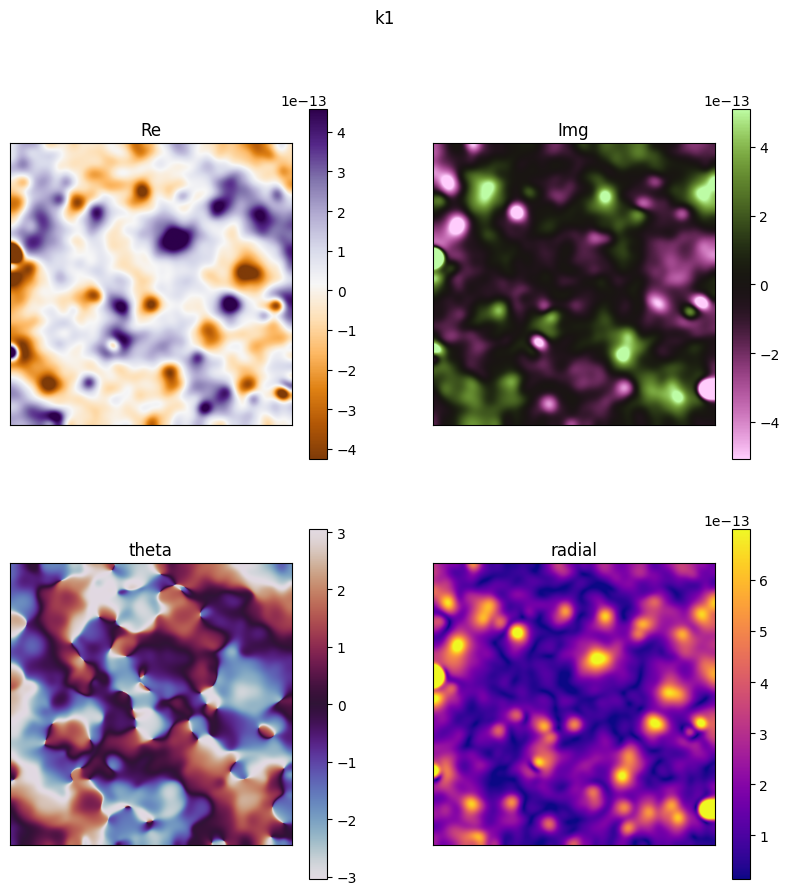

In [25]:
ik = 1 # @param
k = pk_choose[ik]/3
sig = 10 # @param
xprod = kdispacementmap(arr_cln,k,sig)
visxprod(xprod)
plt.suptitle("k"+str(ik))

In [26]:
ks_Latt = pk_choose
ks_CDW = pk_choose/3

In [27]:
def wrap_phase(unwrapped_phase):
  """
  Wraps unwrapped phase data into the range of (-pi, pi].

  Args:
    unwrapped_phase: A numpy array containing the unwrapped phase data.

  Returns:
    A numpy array containing the wrapped phase data.
  """
  wrapped_phase = np.mod(unwrapped_phase + np.pi, 2 * np.pi) - np.pi
  return wrapped_phase
from skimage.restoration import unwrap_phase

In [28]:

sig = 10 # @param
angle_restores = []

for ik in range(3):
  k_Latt = ks_Latt[ik]
  k_CDW = ks_CDW[ik]
  angle_restore = (unwrap_phase(np.angle(kdispacementmap(arr_cln,k_CDW,sig)))
   - unwrap_phase(np.angle(kdispacementmap(arr_cln,k_Latt,sig)))/3)
  angle_restores.append(angle_restore)




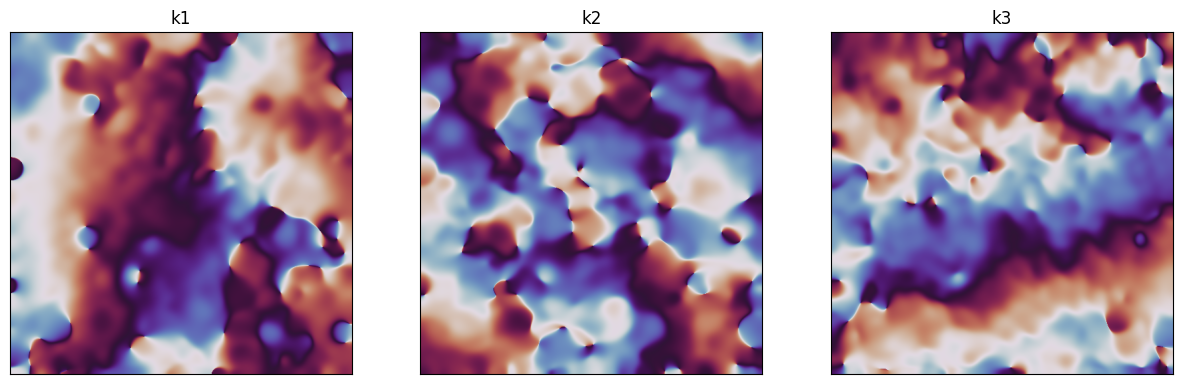

In [29]:
fig,axs = plt.subplots(1,3,figsize=(15, 15))
tns = ['k1','k2','k3']
yns = ['CDW','atom','CDW_compensate']
for ik,tn in zip(range(3),tns):
    reimg = angle_restores[ik]
    reimg = wrap_phase(reimg)
    axs[ik].imshow(reimg, cmap='twilight')
    axs[ik].set_title(tn)
    axs[ik].set_xticks([])
    axs[ik].set_yticks([])

## Tip change effect compensation

In [30]:
class CropWindow:
    def __init__(self, *, xywh=None, xlimylim=None, rlist=None):
        if xywh is not None:
            self.x, self.y, self.w, self.h = xywh
        elif xlimylim is not None:
            (x_min, x_max), (y_min, y_max) = xlimylim
            self.x, self.y = x_min, y_min
            self.w, self.h = x_max - x_min, y_max - y_min
        elif rlist is not None:
            xs = [p[0] for p in rlist]
            ys = [p[1] for p in rlist]
            self.x, self.y = min(xs), min(ys)
            self.w, self.h = max(xs) - min(xs), max(ys) - min(ys)
        else:
            raise ValueError("One of xywh, xlimylim, rlist must be provided.")

    # --------------------
    # 변환 메서드들
    # --------------------
    def to_xywh(self):
        return (self.x, self.y, self.w, self.h)

    def to_xlimylim(self):
        return (self.x, self.x + self.w), (self.y, self.y + self.h)

    def to_rlist(self):
        return [
            (self.x, self.y),
            (self.x + self.w, self.y),
            (self.x + self.w, self.y + self.h),
            (self.x, self.y + self.h),
        ]

    # 보기 좋게 출력
    def __repr__(self):
        return f"CropWindow(xywh={self.to_xywh()})"


Here, no tip change effect

# Phase imaging

## Determine guage ground

In [31]:
def auto_clim(data, method='percentile', lower=1, upper=99):
  """
  data: 2D array
  method: 'percentile' or 'std'
  """
  if method == 'percentile':
      vmin, vmax = np.percentile(data, [lower, upper])
  elif method == 'std':
      mean = np.mean(data)
      std = np.std(data)
      vmin, vmax = mean - std, mean + std
  else:
      raise ValueError("method must be 'percentile' or 'std'")
  return vmin, vmax


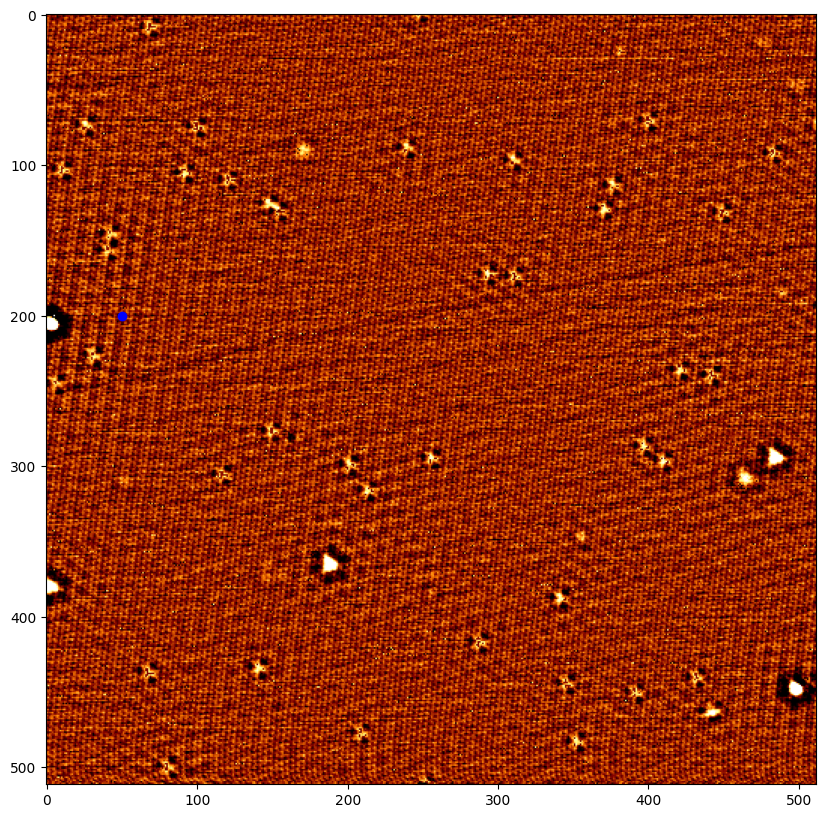

In [32]:
plt.figure(figsize=(10, 10)) # Adjust the size as needed
plt.imshow(arr_cln,cmap='afmhot')
ax = plt.gca()
ax.images[0].set_clim(
    auto_clim(arr_cln, method='percentile', lower=1, upper=99.9)
)
x = 50
y = 200
ax.plot(x,y,"bo")
# ax.set_xlim([700,900])
# ax.set_ylim([700,900])


In [33]:
angle_restores_g = []
for ik in range(3):
  angle_restore = angle_restores[ik]
  angle_restore_g = angle_restore - angle_restore[y,x]
  angle_restores_g.append(angle_restore_g)

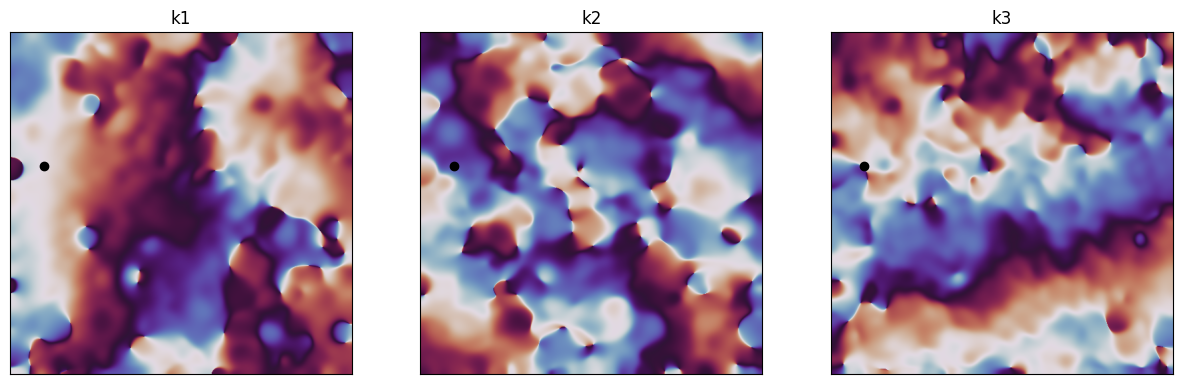

In [34]:
fig,axs = plt.subplots(1,3,figsize=(15, 15))
tns = ['k1','k2','k3']
yns = ['CDW','atom','CDW_compensate']
for ik,tn in zip(range(3),tns):
    reimg = angle_restores[ik]
    reimg = wrap_phase(reimg)
    axs[ik].imshow(reimg, cmap='twilight')
    axs[ik].set_title(tn)
    axs[ik].set_xticks([])
    axs[ik].set_yticks([])
    axs[ik].plot(x,y,"ko")
    # ax.set_xlim([700,900])
    # ax.set_ylim([700,900])

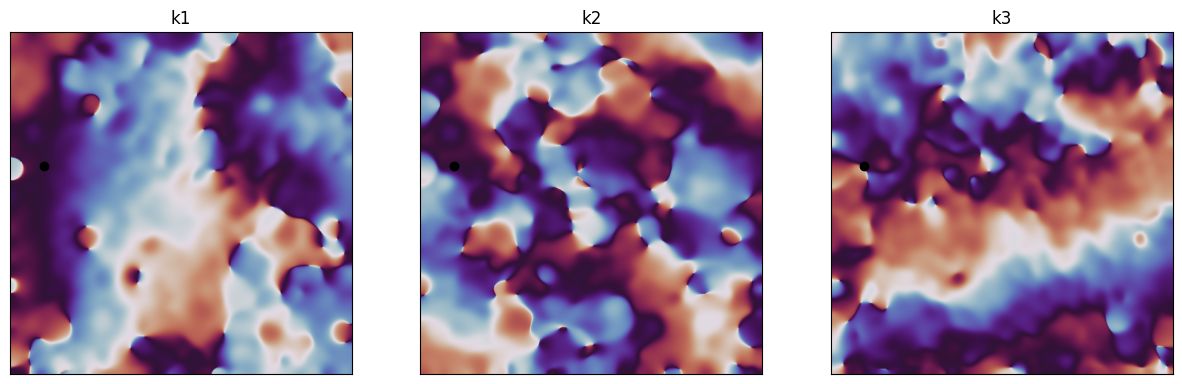

In [35]:
fig,axs = plt.subplots(1,3,figsize=(15, 15))
tns = ['k1','k2','k3']
yns = ['CDW','atom','CDW_compensate']
for ik,tn in zip(range(3),tns):
    reimg = angle_restores_g[ik]
    reimg = wrap_phase(reimg)
    axs[ik].imshow(reimg, cmap='twilight')
    axs[ik].set_title(tn)
    axs[ik].set_xticks([])
    axs[ik].set_yticks([])
    axs[ik].plot(x,y,"ko")
    # ax.set_xlim([700,900])
    # ax.set_ylim([700,900])

In [36]:
import numpy as np

## Divide ##
def z3z3split(phi1,phi2):
  # phi1 from [0,2pi)
  # phi2 from [0,2pi)
  phi1 = phi1%(2*np.pi) # R -> [0,2pi)
  phi2 = phi2%(2*np.pi)
  phi1i = phi1/(2*np.pi) # [0,2pi) -> [0,1)
  phi2i = phi2/(2*np.pi)
  z3z31, rphi1 = divmod(phi1i, 1/3)
  z3z32, rphi2 = divmod(phi2i, 1/3)
  z3z3 = [z3z31,z3z32] # {0,1,2} #len2 list
  rphi12 = [rphi1*3,rphi2*3] # [0,1) #len2 list
  return z3z3,rphi12

def rlsplit(rphi12):
  is_close_10 = rphi12[0]>rphi12[1]#r-like|-> T, g-like|-> F
  if not is_close_10:
    rphi12 = [rphi12[1],rphi12[0]]
  rphi12 = np.array(rphi12)
  rphi12 = rphi12.reshape(2,1) #Basis B
  I_C__B = np.array([[1,-1],[0,1]]) #Identity
  rphi12_C = I_C__B@rphi12 #Basis C
  v_c1 = rphi12_C[0,0]
  v_c2 = rphi12_C[1,0]
  baryHHH_foo = np.array([1-v_c1-v_c2,v_c1,v_c2 ])
  baryHHH_foo = baryHHH_foo.reshape(3,1) #order of index: (00),(??),(11)
  return is_close_10,baryHHH_foo

def sixsplit(baryHHH_foo):
  p_BarHHH = np.sort(baryHHH_foo, axis=0)[::-1]
  z6 = np.argsort(baryHHH_foo, axis=0)[::-1]
  p_AffHHH = p_BarHHH[1:]
  I_AffHAC__AffHHH = np.array([[1,2],[1,-1]])
  p_AffHAC = I_AffHAC__AffHHH@p_AffHHH
  p_BarHAC = np.array([1-p_AffHAC[0]-p_AffHAC[1],p_AffHAC[0],p_AffHAC[1]])
  baryHAC_foo = p_BarHAC
  return z6,baryHAC_foo

## Conquer ##
def get_baryHHH(baryHHH_foo,is_close_10):
  baryHHH = np.zeros(4)
  baryHHH[0] = baryHHH_foo[0,0]
  baryHHH[3] = baryHHH_foo[2,0]
  # print('here',not(is_close_10)+1)
  baryHHH[(not(is_close_10))+1] = baryHHH_foo[1,0]
  return baryHHH #order of index: (00),(10),(01),(11)
def get_baryHAC(is_close_10,baryHAC_foo):
  # baryHAC = np.zeros(3)
  baryHAC = baryHAC_foo
  if not(is_close_10):
    baryHAC = baryHAC_foo[[0,2,1],[0]]
  return baryHAC #order of index: H,10L,01L
def phaseInfo(phi1,phi2):
  z3z3,rphi12 = z3z3split(phi1,phi2)
  is_close_10,baryHHH_foo = rlsplit(rphi12)
  z6,baryHAC_foo = sixsplit(baryHHH_foo)
  baryHHH = get_baryHHH(baryHHH_foo,is_close_10)
  baryHAC = get_baryHAC(is_close_10,baryHAC_foo)
  return baryHHH,baryHAC,z3z3,z6

In [37]:
def phaseInfo2(Phi1,Phi2):
  XY_shape = Phi1.shape
  BaryHHH = np.zeros((XY_shape[0],XY_shape[1],4))
  BaryHAC = np.zeros((XY_shape[0],XY_shape[1],3))
  Z3z3 = np.zeros((XY_shape[0],XY_shape[1],2))
  Z6 = np.zeros((XY_shape[0],XY_shape[1],3))
  for i in range(XY_shape[0]):
    for j in range(XY_shape[1]):
      phi1_now = Phi1[i,j]
      phi2_now = Phi2[i,j]

      baryHHH,baryHAC,z3z3,z6 = phaseInfo(phi1_now,phi2_now)

      BaryHHH[i,j,:] = baryHHH.flatten()
      BaryHAC[i,j,:] = baryHAC.flatten()
      Z3z3[i,j,0] = z3z3[0]
      Z3z3[i,j,1] = z3z3[1]
      Z6[i,j,0] = z6[0]
      Z6[i,j,1] = z6[1]
      Z6[i,j,2] = z6[2]
  return BaryHHH,BaryHAC,Z3z3,Z6

In [38]:
type(angle_restores_g)
angle_restores_g[ik].shape

(512, 512)

In [39]:
Phi1 = (1/2)*angle_restores_g[0]+(-1/4)*angle_restores_g[1]+(-1/4)*angle_restores_g[2]
Phi2 = (-1/4)*angle_restores_g[0]+(1/2)*angle_restores_g[1]+(-1/4)*angle_restores_g[2]


Phi1 = angle_restores_g[0]
Phi2 = -angle_restores_g[1]

In [40]:
Info = phaseInfo2(Phi1,Phi2)

C:\Users\user\AppData\Local\Temp\ipykernel_9808\3436646536.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z6[i,j,0] = z6[0]
C:\Users\user\AppData\Local\Temp\ipykernel_9808\3436646536.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z6[i,j,1] = z6[1]
C:\Users\user\AppData\Local\Temp\ipykernel_9808\3436646536.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z6[i,j,2] = z6[2]


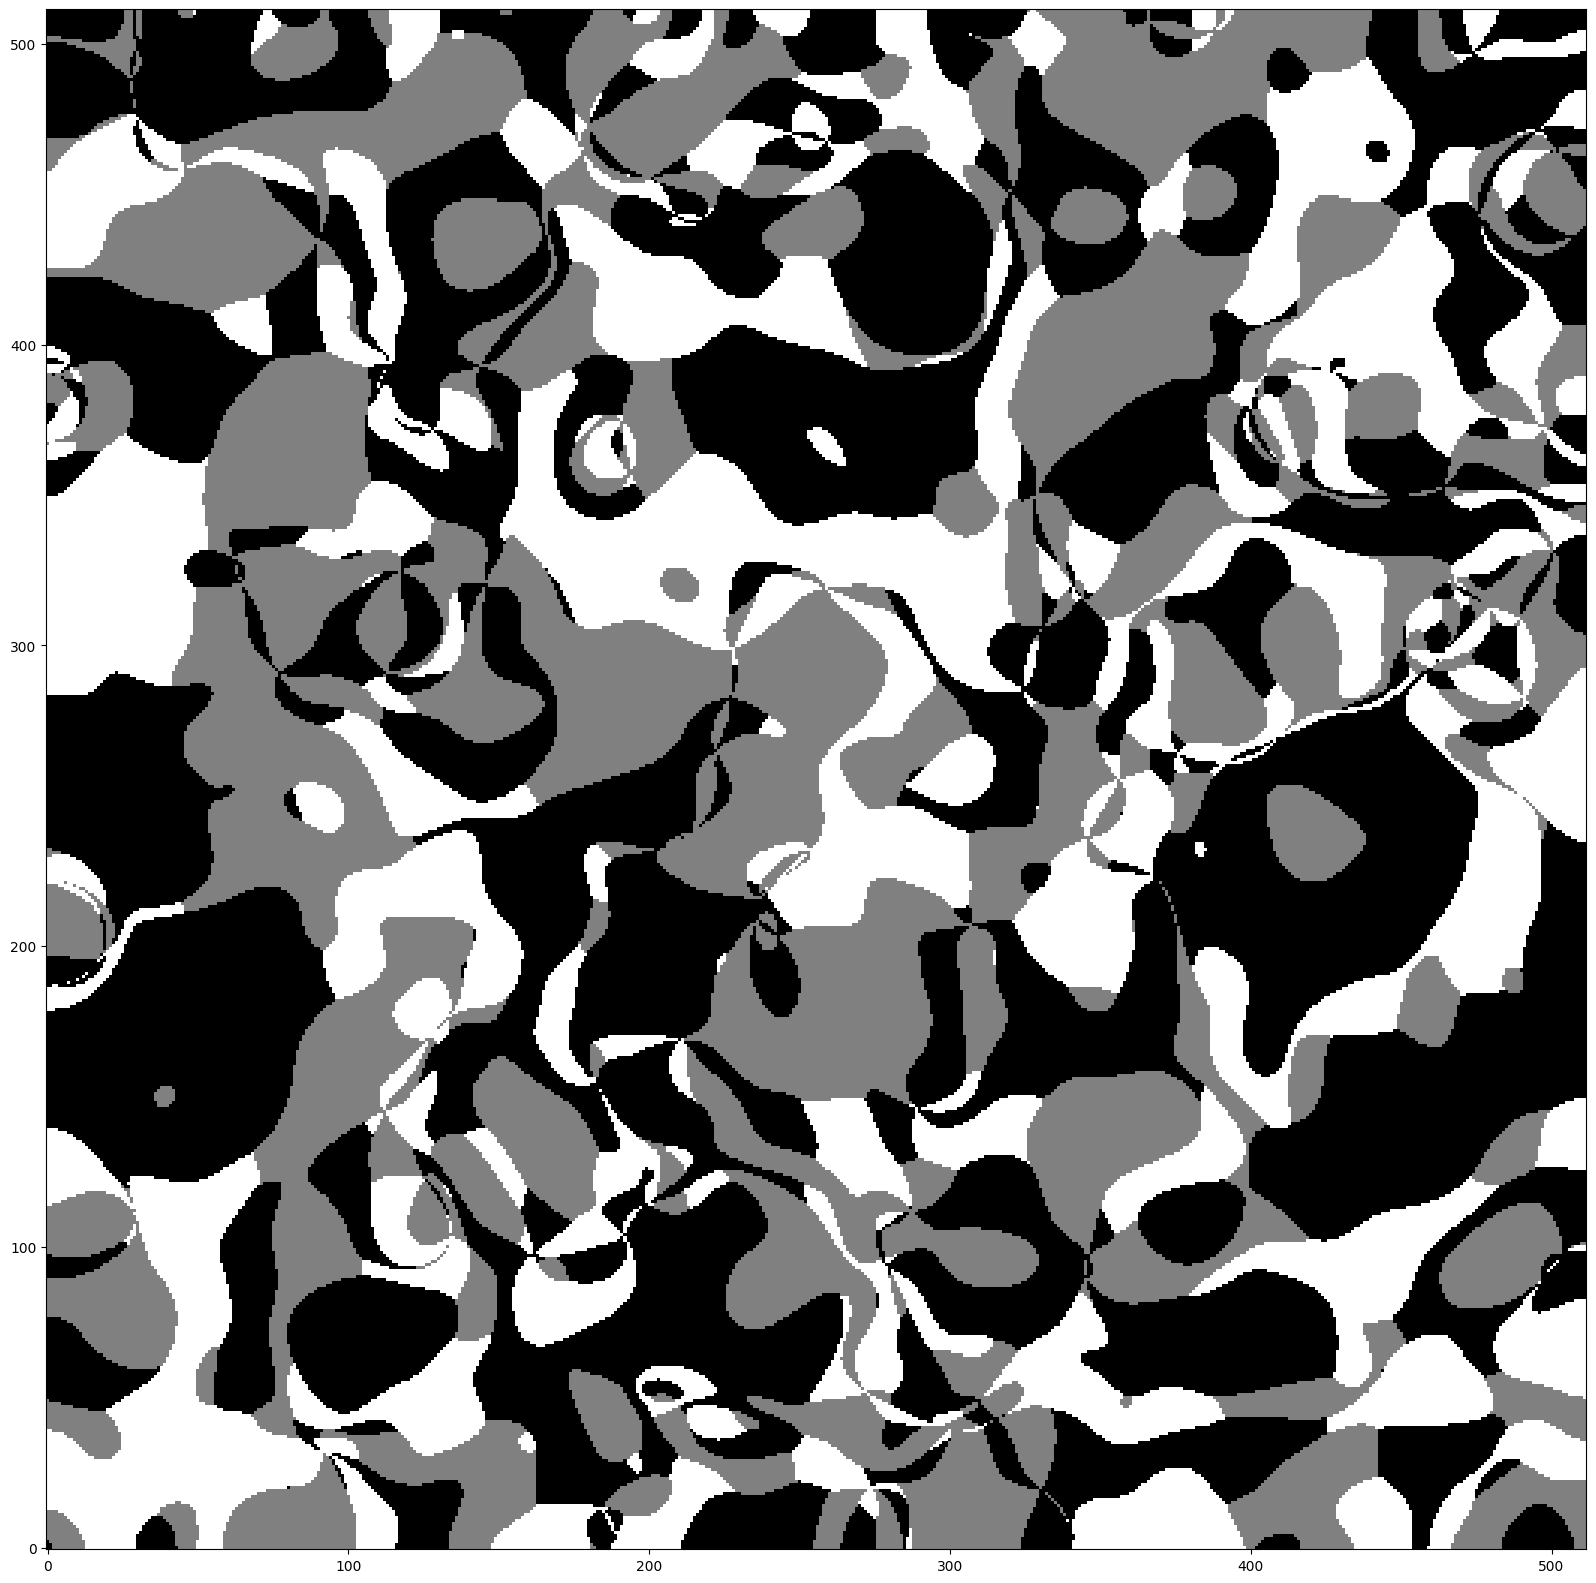

In [41]:
HAC_holder = Info[1]
HAC_argmax = np.argmax(HAC_holder, axis=2)
fig = plt.figure(figsize=(20,20))
plt.imshow(HAC_argmax, origin='lower',cmap='gray')

# plt.plot(250,200,'ro')

In [42]:
DWThick = .2
dlt = DWThick

In [43]:
dwBW = Info[1][:,:,0]<DWThick

In [44]:
def getDWsegment(z6,is_close10):
  class6 = [210,201,120,102,21,12]
  blk = [1012,1102,120,210]
  rlk = [1120,1210,12,102]
  glk = [1021,1201,21,201]
  class12 = np.array([blk,rlk,glk])

  class6this = np.sum(z6*np.array([100,10,1]))
  z6 =  class6 == class6this
  class12this = class6this +1000*is_close10
  classified = class12 == class12this
  true_indices = np.where(classified)
  classified3 = true_indices[0][0]
  return classified3

In [45]:
Z6 = Info[3]
Is_close10 = Info[0][:,:,2]>0

# ix,iy= 93,22

classified3s = np.zeros(Z6.shape[0:2])
for ix in range(Z6.shape[0]):
  for iy in range(Z6.shape[1]):
    z6 = Z6[ix,iy,:]# input 1
    is_close10 = Is_close10[ix,iy]# input 2
    classified3 = getDWsegment(z6,is_close10)
    classified3s[ix,iy] = classified3

In [46]:
classified3s_rgb = np.stack((classified3s==1,classified3s==0,classified3s==2),axis=2)

In [47]:
dw_rgb = classified3s_rgb * dwBW[:, :, np.newaxis]

In [48]:
Z3z3,Rphi12 =  z3z3split(Phi1,Phi2)
coefs = np.array([[-2/4,4/4],[1/2,1/2],[4/4,-2/4]])
# coefs.shape

chiral = np.einsum('ijk,li->jkl', np.array(Rphi12), coefs)
chiral = chiral[:,:,[2,0,1]]
chiral[:,:,2] = -chiral[:,:,2]

In [49]:
chiral_ = np.mod(chiral+dlt/2,.5)-dlt/2
chiral_ = -(1/dlt)*(chiral_-dlt/2)
#chiral_[:,:2]=chiral_[:,:2]

In [50]:
final = chiral_*dw_rgb

In [51]:
final2 = 1

In [52]:
for ik in range(3):
  foo = final[:,:,ik]
  print(foo.min(),foo.max())


0.0 0.999988614465783
-0.0 0.9999777557969215
0.0 0.9998411617222827


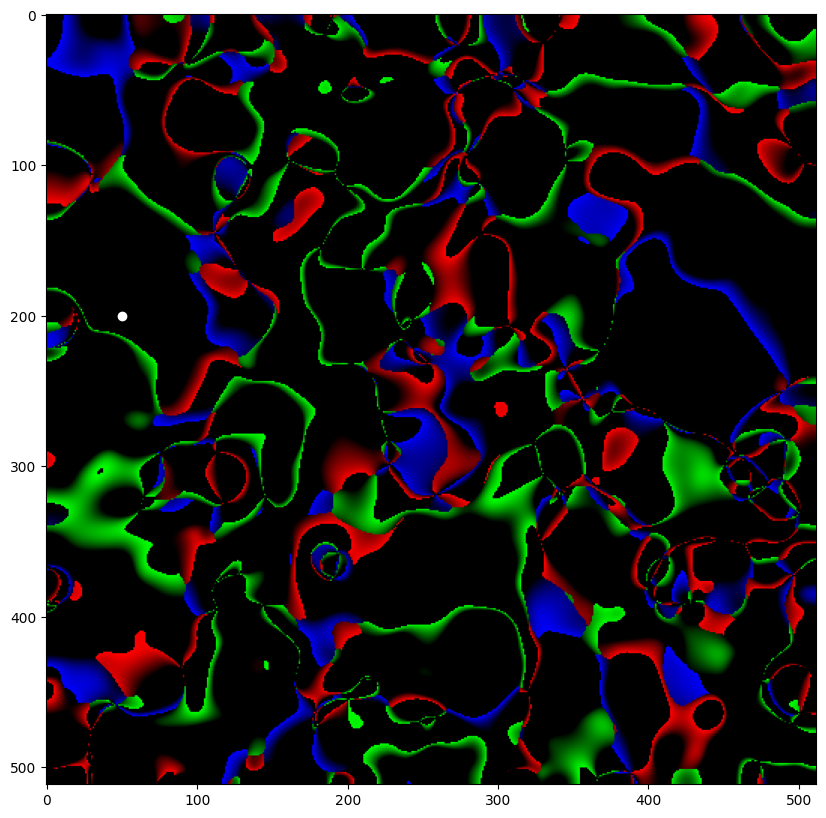

In [53]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(final.astype(np.float64))
plt.plot(x,y,"wo")

In [54]:
from skimage.color import rgb2hsv,hsv2rgb
final2 = rgb2hsv(final)
final2[:,:,1] = final2[:,:,2]
final2[:,:,2] = 1
final2 = hsv2rgb(final2)

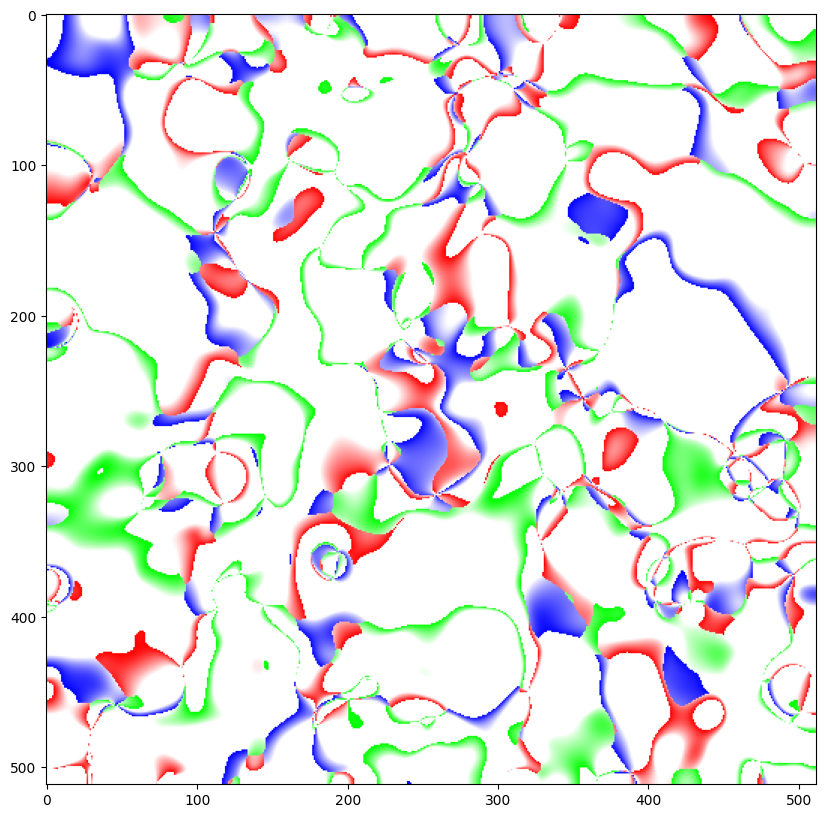

In [55]:
fig = plt.figure(figsize=(10, 10))
plt.imshow(final2.astype(np.float64))


(500.0, 900.0)

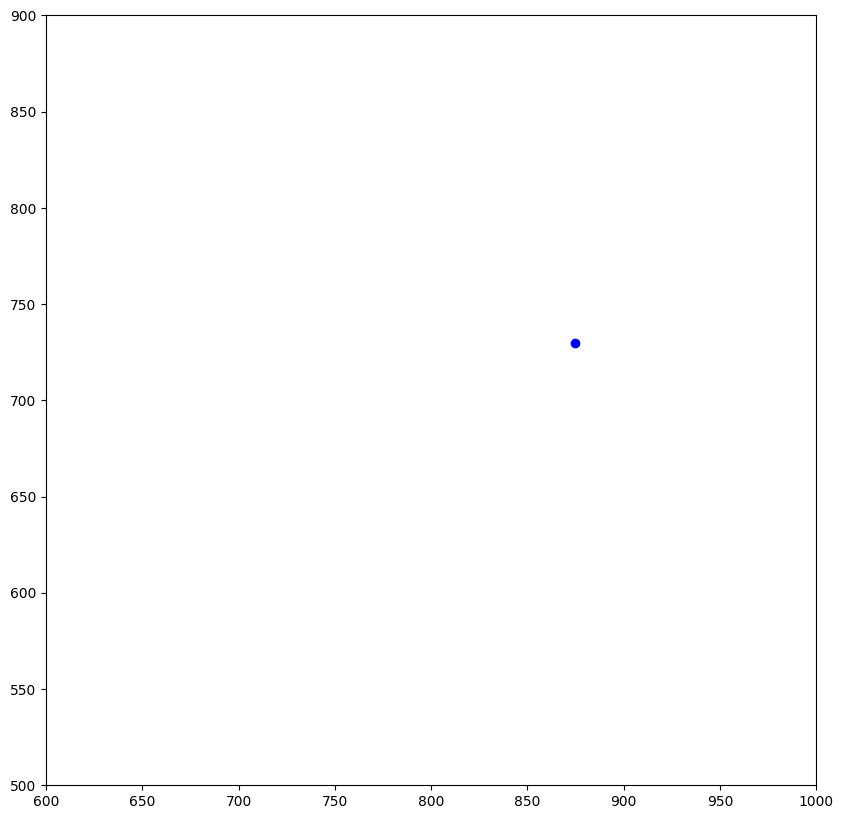

In [56]:
plt.figure(figsize=(10, 10)) # Adjust the size as needed
plt.imshow(arr_cln,cmap='afmhot')
ax = plt.gca()
ax.images[0].set_clim(
    auto_clim(arr_cln, method='percentile', lower=1, upper=99.9)
)
x = 875
y = 730
ax.plot(x,y,"bo")
ax.set_xlim([600,1000])
ax.set_ylim([500,900])

In [57]:
def get_z3z3hex(Info):
  HHH_argmax = np.argmax(Info[0], axis=2)
  mod01,mod10 = np.divmod(HHH_argmax ,2)
  hex1 = np.mod(Info[2][:,:,0] + mod10,3)
  hex2 = np.mod(Info[2][:,:,1] + mod01,3)
  z3z3hex = np.stack((hex1,hex2),axis=2)
  return z3z3hex

In [58]:
z3z3hex = get_z3z3hex(Info)

In [59]:
p_00 = [.5,.5,.5]
p_12 = [.1,.1,.1]
p_21 = [.8,.8,.8]

p_10 = [1,0,0]
p_01 = [0,1,0]
p_22 = [0,0,1]

p_20 = [0,1,1]
p_02 = [1,0,1]
p_11 = [1,1,0]

In [60]:
colors = {
    "Red Bright": (1.0, 0.302, 0.302),   # #FF4D4D
    "Red Dark":   (0.478, 0.110, 0.110), # #7A1C1C
    "Green Bright": (0.302, 1.0, 0.302), # #4DFF4D
    "Green Dark":   (0.110, 0.478, 0.110), # #1C7A1C
    "Blue Bright":  (0.302, 0.58, 1.0),  # #4D94FF
    "Blue Dark":    (0.110, 0.110, 0.478) # #1C1C7A
}

In [61]:
p_00 = [.5,.5,.5]
p_12 = [.1,.1,.1]
p_21 = [.8,.8,.8]

p_10 = colors["Red Dark"]
p_01 = colors["Green Dark"]
p_22 = colors["Blue Dark"]

p_20 = colors["Red Bright"]
p_02 = colors["Green Bright"]
p_11 = colors["Blue Bright"]

In [62]:
clrset = [[p_00,p_01,p_02],[p_10,p_11,p_12],[p_20,p_21,p_22]]
clrset = np.array(clrset)
clrset.shape

(3, 3, 3)

In [63]:
shp = z3z3hex.shape
phase9 = np.zeros((shp[0],shp[1],3))
for ix  in range(shp[0]):
  for iy in range(shp[1]):
    phase9[ix,iy,:] = clrset[int(z3z3hex[ix,iy,0]),int(z3z3hex[ix,iy,1]),:]

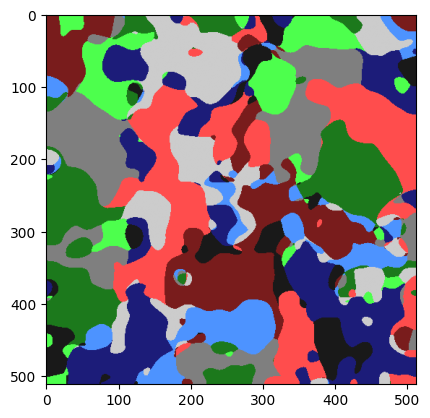

In [64]:
plt.imshow(phase9)

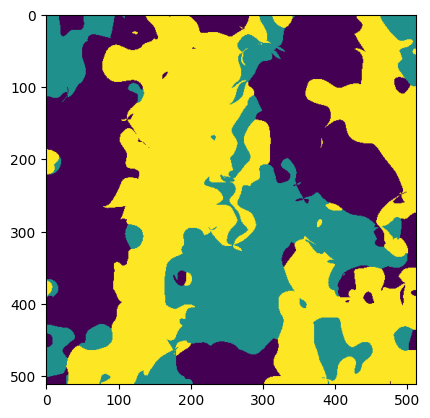

In [65]:
plt.imshow(z3z3hex[:,:,0])

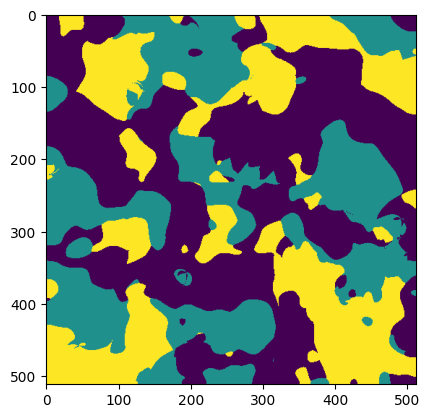

In [66]:
plt.imshow(z3z3hex[:,:,1])

In [67]:
shp

(512, 512, 2)

In [68]:
xlimylim_DWN = ((0,shp[0]),(0,shp[1])) #full
xlimylim_DV = ((0,512),(0,512)) #40nm
xlimylim_DW = ((0,256),(0,256)) #20nm

xlimylim_D = ((0,128),(0,128)) #10nm
xlimylim_L = ((0,64),(0,64))#5nm
xlimylims = [xlimylim_DWN,xlimylim_DV,xlimylim_DW,xlimylim_D,xlimylim_L]
xlimylims = xlimylims[::-1]
# wV =CropWindow(xlimylim=xlimylim_DV)
# plt

In [69]:
# plt.figure(figsize=(10, 10)) # Adjust the size as needed
# plt.imshow(arr_cln,cmap='afmhot')
# ax = plt.gca()
# ax.images[0].set_clim(
#     auto_clim(arr_cln, method='percentile', lower=1, upper=99.9)
# )
# ax.set_xlim(xlimylim_L[0])
# ax.set_ylim(xlimylim_L[1])


In [70]:
class CropWindow:
    def __init__(self, *, xywh=None, xlimylim=None, rlist=None):
        if xywh is not None:
            self.x, self.y, self.w, self.h = xywh
        elif xlimylim is not None:
            (x_min, x_max), (y_min, y_max) = xlimylim
            self.x, self.y = x_min, y_min
            self.w, self.h = x_max - x_min, y_max - y_min
        elif rlist is not None:
            xs = [p[0] for p in rlist]
            ys = [p[1] for p in rlist]
            self.x, self.y = min(xs), min(ys)
            self.w, self.h = max(xs) - min(xs), max(ys) - min(ys)
        else:
            raise ValueError("One of xywh, xlimylim, rlist must be provided.")

    # --------------------
    # 변환 메서드들
    # --------------------
    def to_xywh(self):
        return (self.x, self.y, self.w, self.h)

    def to_xlimylim(self):
        return (self.x, self.x + self.w), (self.y, self.y + self.h)

    def to_rlist(self):
        return [
            (self.x, self.y),
            (self.x + self.w, self.y),
            (self.x + self.w, self.y + self.h),
            (self.x, self.y + self.h),
        ]
    def to_rlist5(self):
        return np.array([
            (self.x, self.y),
            (self.x + self.w, self.y),
            (self.x + self.w, self.y + self.h),
            (self.x, self.y + self.h),
            (self.x, self.y),
        ])
    # 보기 좋게 출력
    def __repr__(self):
        return f"CropWindow(xywh={self.to_xywh()})"

In [71]:
stn = '118K(sig=10)'
tns = ['5nm','10nm','20nm','40nm','full']

Text(0.5, 0.98, '118K(sig=10)')

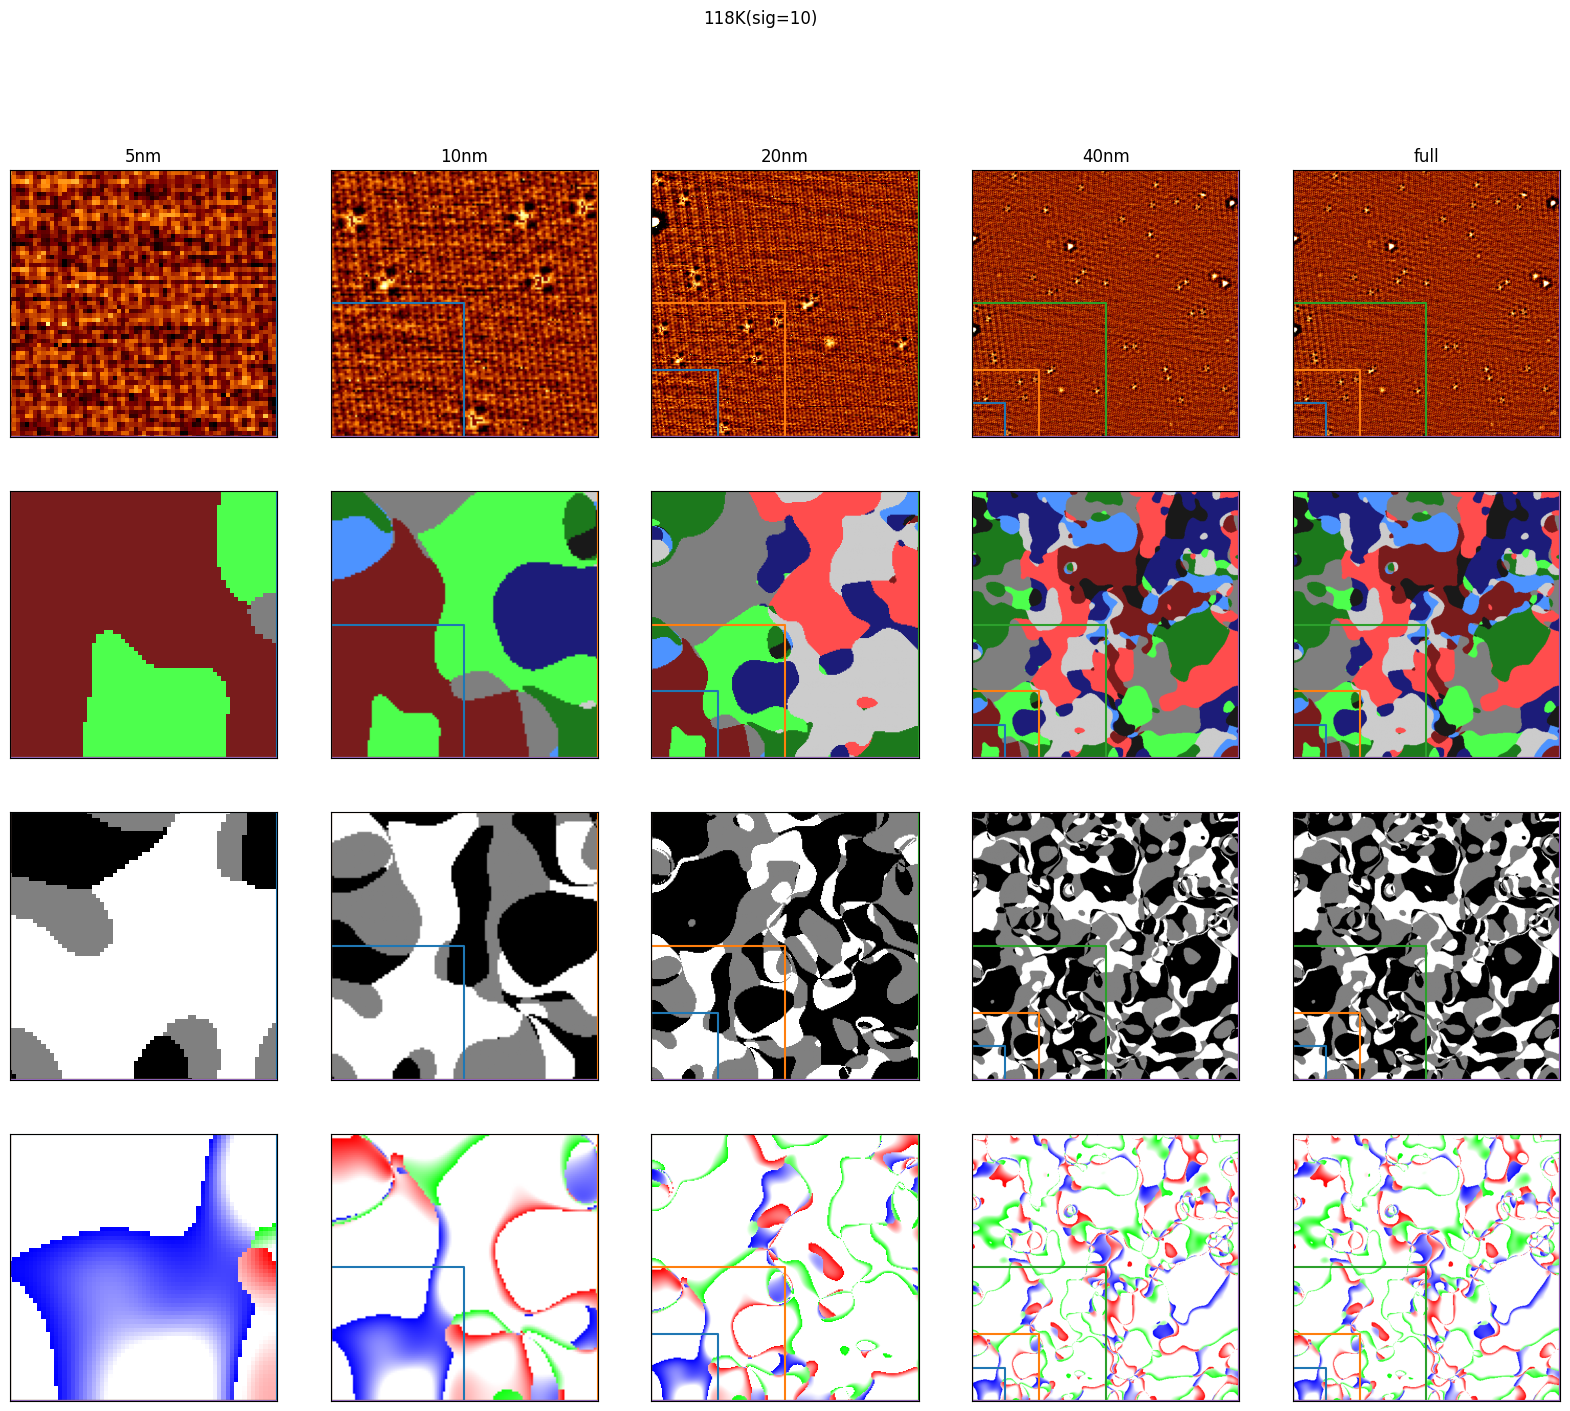

In [72]:
is_subplotTranspose = False # @param {type:"boolean"}
nCr =5
nmap =4
msb = nmap
nsb =nCr


if is_subplotTranspose:
  msb,nsb=nsb,msb
  fig,axs = plt.subplots(msb,nsb,figsize=(nsb*5, msb*4))
  axs = axs.transpose()
else:
  fig,axs = plt.subplots(msb,nsb,figsize=(nsb*4, msb*4))

for iCr in range(nCr):
  for imap in range(nmap):
    ax = axs[imap,iCr]
    if imap==0:
      ax.imshow(arr_cln,cmap='afmhot')
      ax.images[0].set_clim(
          auto_clim(arr_cln, method='percentile', lower=1, upper=99.9)
      )
      ax.set_title(tns[iCr])
    elif imap==1:
      ax.imshow(phase9)
    elif imap==2:
      ax.imshow(HAC_argmax,cmap='gray')
    elif imap==3:
      ax.imshow(final2.astype(np.float64))

    #

    #


    ax.set_xlim(xlimylims[iCr][0])
    ax.set_ylim(xlimylims[iCr][1])
    # if iCr>0:
    #   # xlimylims[iCr-1]
    #   rlist5 = CropWindow(xlimylim=xlimylims[iCr-1]).to_rlist5()
    #   print(rlist5[:,0])
    #   print(rlist5[:,1])
    #   ax.plot(rlist5[:,0],rlist5[:,1],'w')
    for iCr2 in range(nCr):
      rlist5 = CropWindow(xlimylim=xlimylims[iCr2]).to_rlist5()
      ax.plot(rlist5[:,0],rlist5[:,1])
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle(stn)